# 15_ABC_annotation

4/7/2021

take the output of the ABC model and annotate them onto the egenes from gtex list

#  setup

In [25]:
import pandas as pd
import os, glob
import pybedtools
import matplotlib.pyplot as plt
import seaborn as sns
print(plt.style.available)
plt.style.use('seaborn-white')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [26]:
save_dir='abc_out'

In [3]:
THRES=1
rna_file = '/Users/mguo123/Documents/pan_omics_psych/data/interim/rna/tissue_tpm_log_sym_wHEK.csv'
rna_df = pd.read_csv(rna_file, index_col=0)
rna_df[:6]

,Astrocytes,SL_D0,SL_D2,SLC_D0,SLC_D2,H9_D0,H9_D2,H9_D10,H9_D28,HEK293T
A1BG,4.297191,3.040892,2.326729,2.998797,2.206852,3.753284,3.082362,2.648465,2.694880,4.575511
A1BG-AS1,0.516015,1.604071,1.891419,1.409617,1.887525,0.937344,1.914565,2.104337,2.235727,0.000000
A1CF,0.014355,0.021480,0.037968,0.014355,0.004801,0.000000,0.009586,0.150560,0.214125,0.113784
A2M,5.691255,0.077243,1.800469,0.209973,2.915840,0.028569,4.058894,2.244887,1.989139,1.175440
A2M-AS1,0.097611,1.839960,1.416840,0.997594,1.659925,0.361768,0.748461,2.664483,3.167519,0.000000
A2ML1,0.077243,0.157044,0.019109,0.009586,0.000000,2.589763,1.047306,0.084064,0.000000,0.269285


In [4]:
mpra_res_file = 'figure_tables/mpra_res_df_UPDATED_PSYCHENCODE.csv'
mpra_res_df = pd.read_csv(mpra_res_file,index_col=0)
print(mpra_res_df.shape)
print(mpra_res_df.columns)
# make bedfile
mpra_res_bed_df = mpra_res_df[['Chr','Position','rowname']]
mpra_res_bed_df.columns = ['chr','start','name']
mpra_res_bed_df['end'] = mpra_res_bed_df.start +1
mpra_res_bed_df = mpra_res_bed_df[['chr','start','end','name']]
mpra_res_bed = pybedtools.BedTool.from_dataframe(mpra_res_bed_df)
mpra_res_df[:5]


(637, 52)
Index(['rowname', 'Linked_SNP', 'Chr', 'Position', 'Ref/Alt', 'Index_SNP',
       'ConsScore', 'ConsDetail', 'diseases', 'num_dz', 'gwas_pval', 'source',
       'gene_annon', 'ngene_haploreg', 'egene_alltissue_gtex',
       'egene_neurotissue_gtex', 'egene_neurotissue_mapgene_gtex',
       'egene_neurotissue_maptissue_gtex', 'atac_tissues', 'bool_in_atac_pk',
       'hichip_tissues', 'bool_in_hichip_pk', 'broken_motifs', 'gained_motifs',
       'drug_target_gene', 'drug_target_pertname', 'drug_target_moa',
       'drug_target_clinical_phase', 'drug_target_indication',
       'drug_cmap_gene_up', 'drug_cmap_pertname_up', 'drug_cmap_gene_dn',
       'drug_cmap_pertname_dn', 'tissue_asatac', 'bool_is_asatac',
       'tissue_ashichip', 'bool_is_ashichip', 'mpra_tissue', 'mpra_pval_str',
       'mpra_pval_mean', 'mpra_logfc_str', 'mpra_logfc_mean', 'bool_mpra_sig',
       'cgene_egene_agree', 'cgene_egene_agree_num', 'bool_cgene_egene_agree',
       'ukbb_drug', 'ukbb_phenotype', 

/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,rowname,Linked_SNP,Chr,Position,Ref/Alt,Index_SNP,ConsScore,ConsDetail,diseases,num_dz,...,bool_mpra_sig,cgene_egene_agree,cgene_egene_agree_num,bool_cgene_egene_agree,ukbb_drug,ukbb_phenotype,ukbb_phenotype_beta,SNP_id,psychencode_egenes,egenes_all_sources
0,chr5_96161942,rs152280,chr5,96161942,T/G,"rs10198241,rs469758",2,intron,MDD,1,...,True,NaN,0.0,False,bisoprolol,NaN,NaN,5:96161942,NaN,CAST|ERAP1|ERAP2
1,chr22_42347060,rs5996094,chr22,42347060,T/C,rs1023500,1,upstream,SCZ,1,...,True,NaN,0.0,False,NaN,smoking hisotry,0.004,22:42347060,NaN,CCDC134|CYP2D6|DESI1|NAGA|TNFRSF13C
2,chr7_28799411,rs10227088,chr7,28799411,A/G,rs10238623,4,regulatory,GAD,1,...,True,NaN,0.0,False,NaN,miserableness,-0.004,7:28799411,NaN,NaN
3,chr7_1962163,rs10268609,chr7,1962163,G/T,"rs10267593,rs4332037",4,regulatory,BPD|MDD,1,...,True,NaN,0.0,False,aspirin|atorvastatin|bendrofluazide,anxiety history|depression history|fed-up|irri...,-0.003|0.002|-0.002|-0.005|-0.004|-0.003|0.008...,7:1962163,NaN,NaN
4,chr7_1915282,rs7788921,chr7,1915282,C/A,"rs10267593,rs4332037",4,regulatory,BPD,1,...,True,NaN,0.0,False,aspirin|atorvastatin|bendrofluazide,anxiety history|depression history|fed-up|irri...,-0.005|0.003|-0.005|-0.009|-0.008|-0.005|0.014...,7:1915282,NaN,NaN


In [19]:
sig_rownames = mpra_res_df.rowname[mpra_res_df.bool_mpra_sig].values

In [58]:
abc_dir = 'abc_out/all_tissue_predictions/'
abc_files = sorted(glob.glob(os.path.join(abc_dir, '*txt')))
abc_files

['abc_out/all_tissue_predictions/Astrocytes_EnhancerPredictions.txt',
 'abc_out/all_tissue_predictions/H9_D0_EnhancerPredictions.txt',
 'abc_out/all_tissue_predictions/H9_D10_EnhancerPredictions.txt',
 'abc_out/all_tissue_predictions/H9_D28_EnhancerPredictions.txt',
 'abc_out/all_tissue_predictions/H9_D2_EnhancerPredictions.txt',
 'abc_out/all_tissue_predictions/SLC_D0_EnhancerPredictions.txt',
 'abc_out/all_tissue_predictions/SLC_D2_EnhancerPredictions.txt',
 'abc_out/all_tissue_predictions/SL_D0_EnhancerPredictions.txt',
 'abc_out/all_tissue_predictions/SL_D2_EnhancerPredictions.txt']

# testing

In [59]:
# testing
file = abc_files[0]
tissue = os.path.basename(file).split('_Enhancer')[0]
print(tissue)
tissue_expr_genes = rna_df.index[rna_df[tissue]>THRES]
print('num genes expressed',len(tissue_expr_genes))

# get enhancer predictions filter by rna expression
abc_df = pd.read_table(file)
print(abc_df.shape, 'pre rna filt')
abc_df = abc_df[abc_df.TargetGene.isin(tissue_expr_genes)]
print(abc_df.shape, 'post rna filt')
print(abc_df.columns)
# make bed 
abc_bed = pybedtools.BedTool.from_dataframe(abc_df[['chr','start','end','TargetGene']])
abc_df[:5]


Astrocytes
num genes expressed 10258
(133870, 8) pre rna filt
(45672, 8) post rna filt
Index(['chr', 'start', 'end', 'name', 'TargetGene', 'TargetGeneTSS',
       'CellType', 'ABC.Score'],
      dtype='object')


,chr,start,end,name,TargetGene,TargetGeneTSS,CellType,ABC.Score
3,chr9,503683,504183,genic|chr9:503683-504183,CBWD1,188979,Astrocytes,0.038528
4,chr9,503683,504183,genic|chr9:503683-504183,KANK1,470291,Astrocytes,0.033510
15,chr9,694319,694819,genic|chr9:694319-694819,CBWD1,188979,Astrocytes,0.059760
16,chr9,694319,694819,genic|chr9:694319-694819,KANK1,470291,Astrocytes,0.051978
25,chr9,694319,694819,genic|chr9:694319-694819,SMARCA2,2015342,Astrocytes,0.021876


In [60]:
mpra_snp_to_gene =  mpra_res_bed.intersect(abc_bed, wa=True, wb=True).to_dataframe()
mpra_snp_to_gene = mpra_snp_to_gene[['name','thickEnd']]
mpra_snp_to_gene.columns = ['rowname','abc_gene']
mpra_snp_to_gene = mpra_snp_to_gene.merge(mpra_res_df[['rowname','egenes_all_sources']], how='left',on='rowname')
mpra_snp_to_gene['abc_gene_in_gtex'] = mpra_snp_to_gene.apply(lambda row:
                                                              row['abc_gene'] in row['egenes_all_sources'].split('|'),
                                                              axis=1)
mpra_snp_to_gene.abc_gene_in_gtex.value_counts()

False    22
True      4
Name: abc_gene_in_gtex, dtype: int64

In [61]:
(mpra_snp_to_gene[mpra_snp_to_gene.abc_gene_in_gtex]
    .groupby('rowname')
    .agg({'abc_gene':'|'.join})
    .reset_index()
)

,rowname,abc_gene
0,chr22_50963357,MAPK12|CHKB
1,chr8_22479988,PDLIM2
2,chr9_100985311,TBC1D2


# looping through all EnhancerPredictions.txt files

In [62]:
for file in sorted(abc_files):
    tissue = os.path.basename(file).split('_Enhancer')[0]
    print(tissue)

Astrocytes
H9_D0
H9_D10
H9_D28
H9_D2
SLC_D0
SLC_D2
SL_D0
SL_D2


In [63]:
stats_all = {}
mpra_all_df = pd.DataFrame()
gene_tally_df = pd.DataFrame()
for file in abc_files:
    tissue = os.path.basename(file).split('_Enhancer')[0]
    print(tissue)
    tissue_expr_genes = rna_df.index[rna_df[tissue]>THRES]
    print('num genes expressed',len(tissue_expr_genes))
    results = {}

    # get enhancer predictions filter by rna expression
    abc_df = pd.read_table(file)
    print(abc_df.TargetGene.unique().shape[0], 'pre rna filt')
    results['num_abc_hits_prernafilt'] = abc_df.TargetGene.unique().shape[0]
    abc_df = abc_df[abc_df.TargetGene.isin(tissue_expr_genes)]
    results['num_abc_hits_postrnafilt'] = abc_df.TargetGene.unique().shape[0]
    print(abc_df.TargetGene.unique().shape[0], 'post rna filt')
#     print(abc_df.columns)

    # make bed 
    abc_bed = pybedtools.BedTool.from_dataframe(abc_df[['chr','start','end','TargetGene']])

    # get distribution of egenes and their enhancers
    abc_gene_tally = pd.DataFrame(abc_df.TargetGene.value_counts().sort_values()).reset_index()
    abc_gene_tally['tissue'] = tissue
    gene_tally_df = pd.concat([gene_tally_df, abc_gene_tally])
    
    # merging with mpra results
    mpra_snp_to_gene =  mpra_res_bed.intersect(abc_bed, wa=True, wb=True).to_dataframe()
    mpra_snp_to_gene = mpra_snp_to_gene[['name','thickEnd']]
    mpra_snp_to_gene.columns = ['rowname','abc_gene']
    mpra_snp_to_gene = mpra_snp_to_gene.merge(mpra_res_df[['rowname','egenes_all_sources']], how='left',
                                              on='rowname').fillna('')
    mpra_snp_to_gene['abc_gene_in_gtex'] = mpra_snp_to_gene.apply(lambda row:
                                                                  row['abc_gene'] in row['egenes_all_sources'].split('|'),
                                                                  axis=1)
    # report some egene # stats
    results['num_abc_egenes_mpra_total'] = mpra_snp_to_gene.shape[0]
    results['num_abc_egenes_mprasig_total'] = mpra_snp_to_gene[mpra_snp_to_gene.rowname.isin(sig_rownames)].shape[0]
    if True in mpra_snp_to_gene.abc_gene_in_gtex.value_counts().index:
        results['num_abc_egenes_mpra_gtex'] = mpra_snp_to_gene.abc_gene_in_gtex.value_counts().loc[True]
    else:
         results['num_abc_egenes_mpra_gtex'] = 0
    print(mpra_snp_to_gene.abc_gene_in_gtex.value_counts())
    print(mpra_snp_to_gene.shape[0], 'number of abc genes for tissue')
#     mpra_snp_to_gene[:5]
    
    # add all stats #s to dict
    stats_all[tissue] = results
    
#     results_df = (mpra_snp_to_gene[mpra_snp_to_gene.abc_gene_in_gtex]
#     .groupby(['rowname', 'hit'])
#     .agg({'abc_gene':'|'.join})
#     .reset_index()
#     )
    mpra_snp_to_gene['tissue'] = tissue
    mpra_all_df = pd.concat([mpra_all_df, mpra_snp_to_gene])



Astrocytes
num genes expressed 10258
22221 pre rna filt
8612 post rna filt
False    22
True      4
Name: abc_gene_in_gtex, dtype: int64
26 number of abc genes for tissue
H9_D0
num genes expressed 13270
22044 pre rna filt
10181 post rna filt
False    14
Name: abc_gene_in_gtex, dtype: int64
14 number of abc genes for tissue
H9_D10
num genes expressed 14592
25419 pre rna filt
12262 post rna filt
False    42
True      6
Name: abc_gene_in_gtex, dtype: int64
48 number of abc genes for tissue
H9_D28
num genes expressed 14293
24728 pre rna filt
11709 post rna filt
False    36
True      6
Name: abc_gene_in_gtex, dtype: int64
42 number of abc genes for tissue
H9_D2
num genes expressed 13610
24906 pre rna filt
11531 post rna filt
False    19
True      3
Name: abc_gene_in_gtex, dtype: int64
22 number of abc genes for tissue
SLC_D0
num genes expressed 12930
22661 pre rna filt
10520 post rna filt
False    17
True     11
Name: abc_gene_in_gtex, dtype: int64
28 number of abc genes for tissue
SLC_D2
nu

# Plots

In [64]:
pd.DataFrame(gene_tally_df.TargetGene.describe())

,TargetGene
count,97175.000000
mean,3.608263
std,2.829876
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,20.000000


on average 3.6 enhancers per gene (median 3, very right skewed)

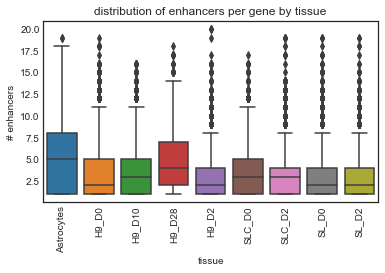

In [77]:
ax = sns.boxplot(x="tissue", y="TargetGene", data=gene_tally_df)
ax.set_ylabel('# enhancers')
ax.set_title('distribution of enhancers per gene by tissue')
plt.xticks(rotation=90)
plt.gcf().subplots_adjust(bottom=0.25)
# plt.margins(x=2)
plt.savefig(os.path.join(save_dir,'dist_num_enhancer_genes_bytissue.pdf'))
plt.show()

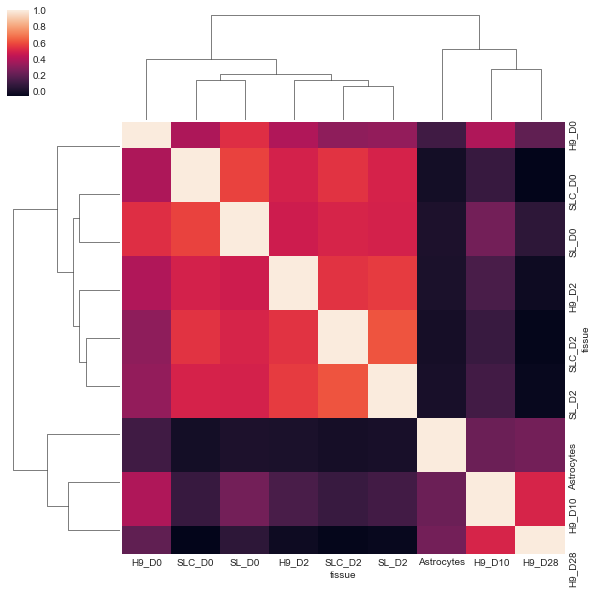

In [66]:
gene_tissue_comp = gene_tally_df.pivot(index='index',columns='tissue',values='TargetGene').fillna(0)
# sns.clustermap(gene_tissue_comp)
g =  sns.clustermap(gene_tissue_comp.corr())
g.savefig(os.path.join(save_dir, 'gene_tissue_heatmap.pdf'))
plt.show()

In [67]:
gene_tally_df_alltissue = (gene_tally_df
   .groupby('index')
   .agg({'TargetGene':[sum,'count']})
   .reset_index()
   .set_axis(['gene','num_enhancer','num_tissues_w_enhancer'],
                                 inplace=False,axis=1)
   .sort_values('num_enhancer',ascending=False)                  
)    
gene_tally_df_alltissue.to_csv(os.path.join(save_dir,'gene_tally_df_alltissue.csv' ))

In [68]:
gene_tally_df_alltissue[gene_tally_df_alltissue.num_tissues_w_enhancer==9]

,gene,num_enhancer,num_tissues_w_enhancer
10086,PPP2R3B,127,9
5588,GTPBP6,126,9
9749,PLCXD1,125,9
2232,CD99,115,9
11979,SLC25A6,115,9
...,...,...,...
4341,FAM122C,10,9
4340,FAM122B,10,9
1642,C20orf96,10,9
5069,GATAD1,10,9


count       9.000000
mean     1724.000000
std      1017.503685
min       832.000000
25%       913.000000
50%      1195.000000
75%      2174.000000
max      3419.000000
Name: num_tissues_w_enhancer, dtype: float64


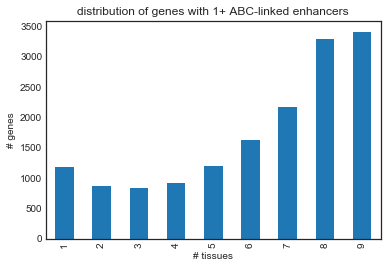

In [69]:
dist_num_tissues_enhancer_genes = gene_tally_df_alltissue.num_tissues_w_enhancer.value_counts().sort_index()
print(dist_num_tissues_enhancer_genes.describe())
ax = dist_num_tissues_enhancer_genes.plot.bar()
ax.set_xlabel('# tissues')
ax.set_ylabel('# genes')
ax.set_title('distribution of genes with 1+ ABC-linked enhancers')
plt.savefig(os.path.join(save_dir,'dist_num_tissues_enhancer_genes.pdf'))
plt.show()

bimodal distribution

### mpra stats with ABC

In [70]:
stats_df= pd.DataFrame.from_dict(stats_all,orient='index')
stats_df['frac_mpra_in_abc'] = stats_df.num_abc_egenes_mpra_total.div(stats_df.num_abc_hits_postrnafilt)
stats_df['frac_gtex_in_abc'] = stats_df.num_abc_egenes_mpra_gtex.div(stats_df.num_abc_egenes_mpra_total)
stats_df.to_csv(os.path.join(save_dir, 'stats_df.csv'))
print(stats_df.describe())
stats_df[['num_abc_egenes_mpra_total','num_abc_egenes_mprasig_total', 'num_abc_egenes_mpra_gtex',
          'frac_mpra_in_abc', 'frac_gtex_in_abc']]
stats_df.columns

       num_abc_hits_prernafilt  num_abc_hits_postrnafilt  \
count                 9.000000                  9.000000   
mean              23513.000000              10797.222222   
std                1721.899532               1193.743040   
min               20409.000000               8612.000000   
25%               22221.000000              10181.000000   
50%               24448.000000              11297.000000   
75%               24781.000000              11595.000000   
max               25419.000000              12262.000000   

       num_abc_egenes_mpra_total  num_abc_egenes_mprasig_total  \
count                   9.000000                      9.000000   
mean                   30.000000                     30.000000   
std                    10.523783                     10.523783   
min                    14.000000                     14.000000   
25%                    25.000000                     25.000000   
50%                    28.000000                     28.000000 

Index(['num_abc_hits_prernafilt', 'num_abc_hits_postrnafilt',
       'num_abc_egenes_mpra_total', 'num_abc_egenes_mprasig_total',
       'num_abc_egenes_mpra_gtex', 'frac_mpra_in_abc', 'frac_gtex_in_abc'],
      dtype='object')

In [71]:
print(mpra_all_df.shape)
mpra_all_df.to_csv(os.path.join(save_dir,'mpra_all_df.csv'))

(270, 5)


In [72]:
results_all_df_filt = mpra_all_df[mpra_all_df.rowname.isin(sig_rownames)]
results_all_df_filt.shape

(270, 5)

##  mapping the hits (and diseases to the correct tissue)

In [73]:
results_all_df_filt = results_all_df_filt.merge(mpra_res_df[['rowname','Linked_SNP','diseases']],on='rowname')

In [74]:
# print(results_all_df.shape)
# results_all_df_filt = results_all_df[results_all_df.hit!='']
# print(results_all_df_filt.shape)
# results_all_df_filt['hit_disease_match'] = results_all_df_filt.apply(lambda row: row['tissue'] in hit_to_disease[row['hit']],axis=1)
# print(results_all_df_filt.hit_disease_match.value_counts())
# results_all_df_filt.to_csv(os.path.join(save_dir,'results_all_df_filt.csv'))


In [75]:
snp_gene_df = (results_all_df_filt
 .groupby('rowname')
 .agg({'abc_gene': lambda arr: '|'.join(sorted(set(arr))),
       'tissue':lambda arr: '|'.join(sorted(set(arr))),
       'diseases':lambda arr: '|'.join(sorted(set(arr))),
       'Linked_SNP':'count'
     })
 .reset_index()
)
snp_gene_df.to_csv(os.path.join(save_dir,'snp_gene_df.csv'))
print(snp_gene_df.shape)
snp_gene_df

(21, 5)


,rowname,abc_gene,tissue,diseases,Linked_SNP
0,chr12_12870695,MANSC1|TAS2R19,SLC_D2,ADHD,2
1,chr16_68402649,AARS|DDX19B,SL_D0,SCZ,2
2,chr19_50096859,ALDH16A1|BCL2L12|DBP|FLT3LG|IRF3|KCNJ14|PIH1D1...,H9_D28|SL_D0,SCZ,15
3,chr1_150253872,ANP32E,Astrocytes,SCZ,1
4,chr1_36616337,STK40,H9_D10|H9_D28|SLC_D0|SL_D0,SCZ,4
5,chr21_17828291,BTG3|C21orf91|CHODL|CXADR|NCAM2|NRIP1|USP25,H9_D10,ADHD,7
6,chr22_50963357,ADM2|ALG12|ARSA|BRD1|CHKB|CHKB-CPT1B|CPT1B|CRE...,Astrocytes|H9_D10|H9_D28|SLC_D2|SL_D2,SCZ,67
7,chr2_110274179,BUB1|CCDC138|EDAR|NPHP1|RANBP2|RGPD5|SEPT10|SO...,H9_D2|SLC_D0|SL_D0,SCZ,14
8,chr2_68478919,AAK1|ANTXR1|ANXA4|APLF|ASPRV1|C1D|CNRIP1|ETAA1...,H9_D28|SLC_D0|SLC_D2,SCZ,36
9,chr3_136751460,IL20RB|MSL2|NCK1|PCCB|PPP2R3A|SLC35G2|STAG1,H9_D10|H9_D2,SCZ,11


In [81]:
mpra_res_df.columns

Index(['rowname', 'Linked_SNP', 'Chr', 'Position', 'Ref/Alt', 'Index_SNP',
       'ConsScore', 'ConsDetail', 'diseases', 'num_dz', 'gwas_pval', 'source',
       'gene_annon', 'ngene_haploreg', 'egene_alltissue_gtex',
       'egene_neurotissue_gtex', 'egene_neurotissue_mapgene_gtex',
       'egene_neurotissue_maptissue_gtex', 'atac_tissues', 'bool_in_atac_pk',
       'hichip_tissues', 'bool_in_hichip_pk', 'broken_motifs', 'gained_motifs',
       'drug_target_gene', 'drug_target_pertname', 'drug_target_moa',
       'drug_target_clinical_phase', 'drug_target_indication',
       'drug_cmap_gene_up', 'drug_cmap_pertname_up', 'drug_cmap_gene_dn',
       'drug_cmap_pertname_dn', 'tissue_asatac', 'bool_is_asatac',
       'tissue_ashichip', 'bool_is_ashichip', 'mpra_tissue', 'mpra_pval_str',
       'mpra_pval_mean', 'mpra_logfc_str', 'mpra_logfc_mean', 'bool_mpra_sig',
       'cgene_egene_agree', 'cgene_egene_agree_num', 'bool_cgene_egene_agree',
       'ukbb_drug', 'ukbb_phenotype', 'ukbb_phen

In [83]:
snp_gene_df_for_table = snp_gene_df[['rowname','abc_gene','tissue']]
snp_gene_df_for_table.columns = ['rowname','abc_genes','abc_gene_tissues']

In [85]:
mpra_res_df_updated = mpra_res_df.merge(snp_gene_df_for_table,how='left',on='rowname').fillna('')

mpra_res_df_updated.to_csv('figure_tables/mpra_res_df_UPDATED_ABC.csv')
mpra_res_df_updated

,rowname,Linked_SNP,Chr,Position,Ref/Alt,Index_SNP,ConsScore,ConsDetail,diseases,num_dz,...,cgene_egene_agree_num,bool_cgene_egene_agree,ukbb_drug,ukbb_phenotype,ukbb_phenotype_beta,SNP_id,psychencode_egenes,egenes_all_sources,abc_genes,abc_gene_tissues
0,chr5_96161942,rs152280,chr5,96161942,T/G,"rs10198241,rs469758",2,intron,MDD,1,...,0.0,False,bisoprolol,,,5:96161942,,CAST|ERAP1|ERAP2,,
1,chr22_42347060,rs5996094,chr22,42347060,T/C,rs1023500,1,upstream,SCZ,1,...,0.0,False,,smoking hisotry,0.004,22:42347060,,CCDC134|CYP2D6|DESI1|NAGA|TNFRSF13C,,
2,chr7_28799411,rs10227088,chr7,28799411,A/G,rs10238623,4,regulatory,GAD,1,...,0.0,False,,miserableness,-0.004,7:28799411,,,,
3,chr7_1962163,rs10268609,chr7,1962163,G/T,"rs10267593,rs4332037",4,regulatory,BPD|MDD,1,...,0.0,False,aspirin|atorvastatin|bendrofluazide,anxiety history|depression history|fed-up|irri...,-0.003|0.002|-0.002|-0.005|-0.004|-0.003|0.008...,7:1962163,,,,
4,chr7_1915282,rs7788921,chr7,1915282,C/A,"rs10267593,rs4332037",4,regulatory,BPD,1,...,0.0,False,aspirin|atorvastatin|bendrofluazide,anxiety history|depression history|fed-up|irri...,-0.005|0.003|-0.005|-0.009|-0.008|-0.005|0.014...,7:1915282,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,chr8_27317337,rs2280375,chr8,27317337,A/G,,1,downstream,SCZ,1,...,0.0,False,,,,8:27317337,,PTK2B|TRIM35,,
633,chr8_27317445,rs1057137,chr8,27317445,G/T,,1,downstream,SCZ,1,...,0.0,False,,miserableness,-0.004,8:27317445,,CHRNA2|TRIM35,,
634,chr8_27318391,rs2292974,chr8,27318391,C/T,,1,downstream,SCZ,1,...,0.0,False,,depression history|worry,0.020|-0.009,8:27318391,,CHRNA2|PTK2B,,
635,chr8_27324844,rs2565061,chr8,27324844,G/A,,5,synonymous,SCZ,1,...,0.0,False,,,,8:27324844,,PTK2B|TRIM35,,
